In [44]:
import cv2 
import numpy as np
import copy
import matplotlib.pyplot as plt

## FUNCTIONS

In [45]:
##### rgb_2_hsv function
##### This function converts one pixel rgb value to hsv value.
##### Input: 3D array of one pixel
##### output: converted pixel array with hsv values

In [46]:
def rgb_2_hsv(rgb3d):
    # This function is used to convert the rgb value to hsv value
    # input : A 3-Dimensional array representing RGB values
    # output : A 3-Dimensional array representing HSV values
    rgb = rgb3d[0][0] #getting the rgb 1-D array from 3-D array
    rgb = rgb/255

    # Initialising the hsv values
    h=0.0
    s=0.0
    v=0.0
    #Finding the MAX and MIN values
    v=np.max(rgb)
    v_min=np.min(rgb)

    # setting saturation values
    if v > 0.0:
        s = (v-v_min)/v
    else:
        s = 0.0
    
    # calculating v-vmin 
    diff = v-v_min
    # Are r,g,b equal. 
    if(rgb[0] == rgb[1] and rgb[1] == rgb[2]):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0] == v):
        h = 60 * (rgb[1] - rgb[2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[1] == v):
        h = 120 + 60 * (rgb[2] - rgb[0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[2] == v):
        h = 240 + 60 * (rgb[0] - rgb[1]) / diff
    h=round(h/2)
    #Normalizing the color values to cv2 standards
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))
    return np.array([[[h,s,v]]])


In [47]:
### rgb_to_hsv_pixel function takes in RGB image and converts every pixel RGB value to HSV value.
### input: RGB image
### output: returns HSV image

In [48]:

def rgb_to_hsv_pixel(img):
    new_img=copy.deepcopy(img)
    #Loop through the pixel array testing if the pixel is white.

    #Save the height and width.
    h = img.shape[0]
    w = img.shape[1]

    #new_img=np.array()
    #For each row in our grid. y = row
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #If the RGB values equal white.
            hsv = rgb_2_hsv([[img[y,x]]])
            new_img[y,x] = hsv
    return new_img
    
    
    

# EXTRA CREDIT PROBLEM

In [49]:
# BGR2RGB Takes in BGR image and converts pixel by pixel to RGB and returns the RGB image
# Input: BGR image
# output: RGB image

In [50]:

def BGR2RGB(bgr_img):
    rgb_img = copy.deepcopy(bgr_img)
    #Loop through the pixel array and update each pixel to RGB values
    #Save the height and width.
    h = bgr_img.shape[0]
    w = bgr_img.shape[1]
    #For each row in our grid. y = row
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            rgb_img[y][x][2]=bgr_img[y][x][0]
            rgb_img[y][x][1]=bgr_img[y][x][1]
            rgb_img[y][x][0]=bgr_img[y][x][2]
    return rgb_img

In [51]:
# RGB2BGR Takes in RGB image and converts pixel by pixel to BGR and returns the BGR image
# Input: RGB image
# output: BGR image

In [52]:

def RGB2BGR(rgb_img):
    bgr_img = copy.deepcopy(rgb_img)
    #Loop through the pixel array and update each pixel to RGB values
    #Save the height and width.
    h = rgb_img.shape[0]
    w = rgb_img.shape[1]
    #For each row in our grid. y = row
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            bgr_img[y][x][2] = rgb_img[y][x][0]
            bgr_img[y][x][1] = rgb_img[y][x][1]
            bgr_img[y][x][0] = rgb_img[y][x][2]
    return bgr_img

# IMAGE PIPELINE USING ABOVE FUNCTIONS

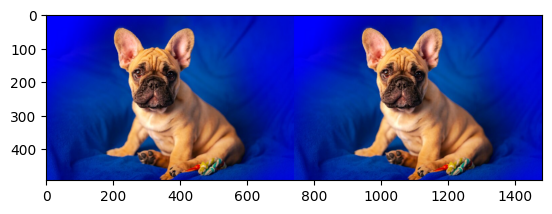

In [53]:
path = 'C://Users//HP//Downloads//dog.jpg'
img = cv2.imread(path, 1)
cv2_img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = BGR2RGB(img)
plt.imshow(np.concatenate([cv2_img_rgb, img_rgb], axis =1))
#plt.imshow(img_rgb)

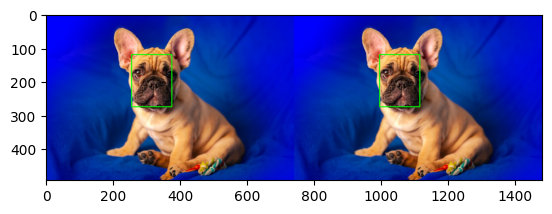

In [54]:
# Convert back to BGR
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

# Top left of rectangle.
top_left = (255, 120)

# Bottom right of rectangle.
bottom_right = (375, 275)

# Color
rect_color = (0,255,0)

# Thickness of line
thickness = 2

# Apply rectangle.
img_rect = cv2.rectangle(img_bgr, top_left, bottom_right, rect_color, thickness)

# Convert back to RGB
cv2_img_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)
img_rect = BGR2RGB(img_rect)

# Make image larger on plot.
#fig = plt.figure(figsize=(15,15))

# Plot images converted using cv2 and the function created 
plt.imshow(np.concatenate([cv2_img_rect, img_rect], axis =1))
#plt.imshow(img_rect)


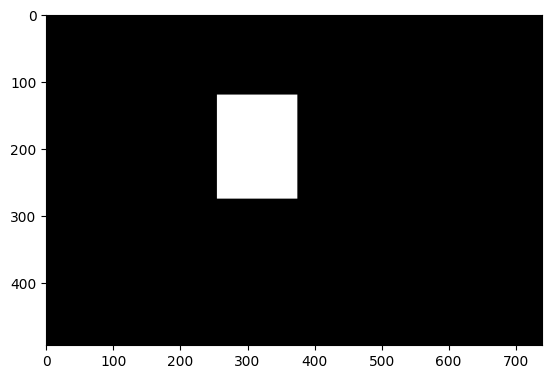

In [55]:
# Create an black mask.
mask = np.zeros(img.shape[:2], np.uint8)

# Add the white portion of the mask.
mask[120:275, 255:375] = 255

# Plot mask.
plt.imshow(mask, cmap="gray")

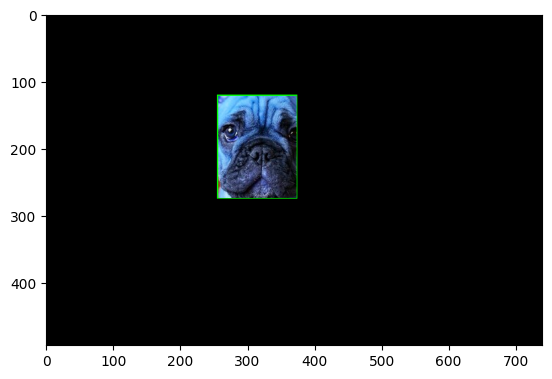

In [56]:
img_masked = cv2.bitwise_and(img_bgr, img_bgr, mask = mask)
plt.imshow(img_masked)


converted to hsv image 


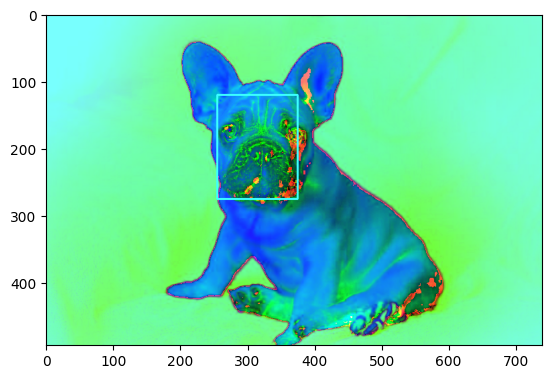

In [57]:
print("converted to hsv image ")
plt.imshow(rgb_to_hsv_pixel(BGR2RGB(img_bgr)))


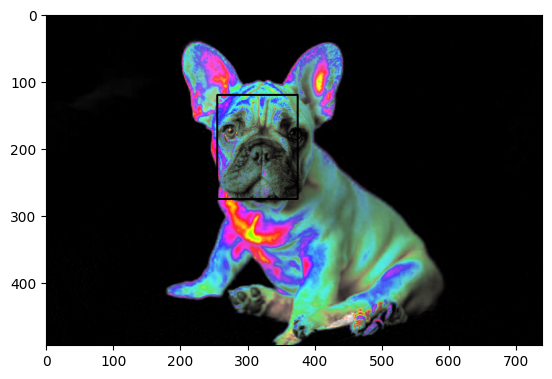

In [58]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_HSV2RGB))

In [59]:
path = 'C://Users//HP//Downloads//dog.jpg'
img = cv2.imread(path, 1)
img_rgb = BGR2RGB(img)
#cv2_img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [60]:
img_hsv = rgb_to_hsv_pixel(img_rgb) ##Using the function created to convert RGB to HSV pixel by pixel

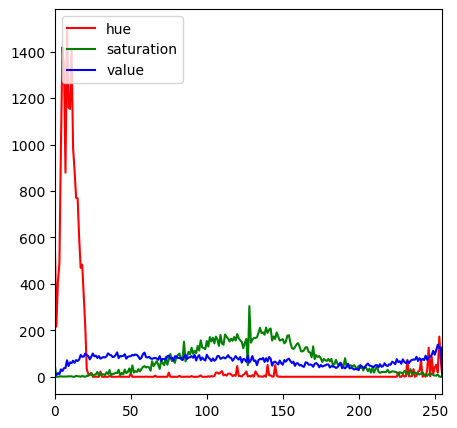

In [61]:
# Size of the histogram
fig = plt.figure(figsize=(5,5))

# Plot the hue.
hist = cv2.calcHist([img_hsv],[0],mask,[256],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])

# Plot the saturation
hist = cv2.calcHist([img_hsv],[1],mask,[256],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])

# Plot the value
hist = cv2.calcHist([img_hsv],[2],mask,[256],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])

plt.legend(('hue', 'saturation', 'value'), loc = 'upper left')
plt.show()

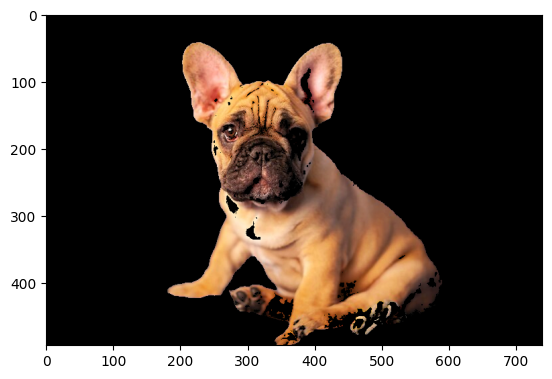

In [62]:
# Minimum and maximum HSV values.
min_HSV = np.array([0,0,0], np.uint8)
max_HSV = np.array([20,220,255], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img_hsv, min_HSV, max_HSV)

# Bitwise And mask
skinHSV = cv2.bitwise_and(img_hsv, img_hsv, mask=skinArea)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Plot masked image.
plt.imshow(skinHSV)